In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

def type_of_pair(i1, i2):
    if (i1 < 200) and (i2 < 200):
        return "type one"
    if (i1 >= 200) and (i2 >= 200):
        return "type two"
    return "cross"

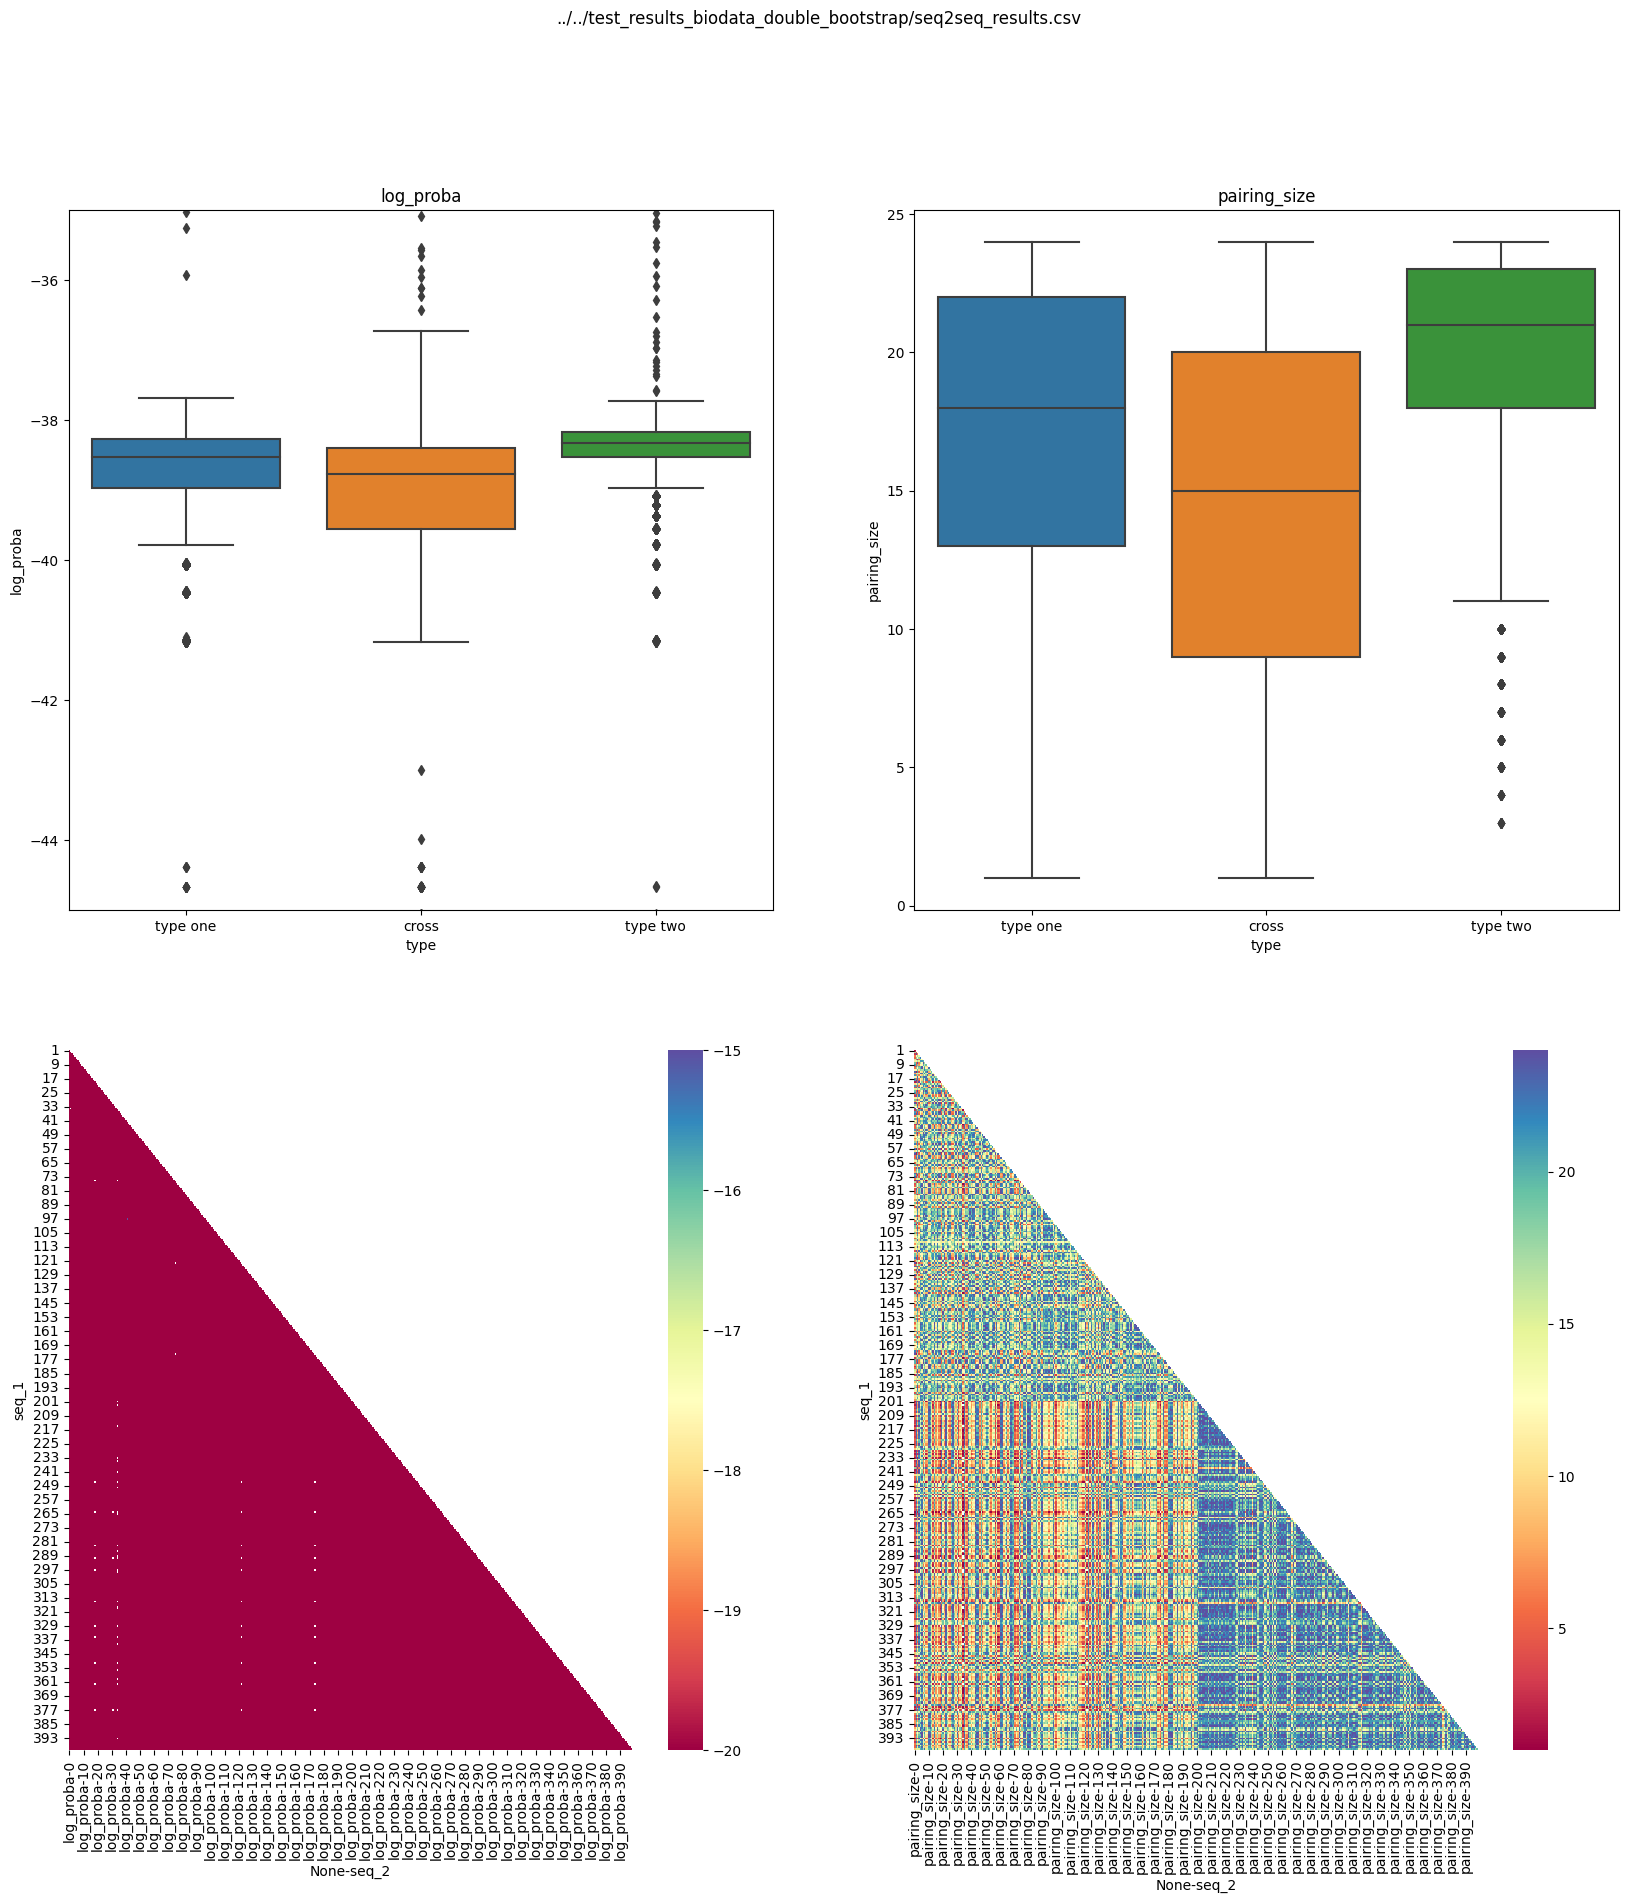

In [6]:
filename = "../../test_results_biodata_double_bootstrap/seq2seq_results.csv"
df = pd.read_csv(filename, sep=';', header=None)
df.columns = ["seq_1", "seq_2", "proba", "pairing_size", "pairing"]
df['log_proba'] = np.log(df['proba'])
df['type'] = df.apply(lambda row: type_of_pair(row["seq_1"], row["seq_2"]), axis=1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

sns.boxplot(data=df, x='type', y='log_proba', ax=axes[0,0])
axes[0,0].set_ylim(-45, -35)
axes[0,0].set_title("log_proba")

sns.boxplot(data=df, x='type', y='pairing_size', ax=axes[0,1])
axes[0,1].set_title("pairing_size")

mat = pd.pivot_table(df, values=['log_proba'], columns=['seq_2'], index=['seq_1'])
sns.heatmap(mat, vmin=-20, vmax=-15, cmap="Spectral", ax=axes[1,0]) 

mat = pd.pivot_table(df, values=['pairing_size'], columns=['seq_2'], index=['seq_1'])
sns.heatmap(mat, cmap="Spectral", ax=axes[1,1])

plt.suptitle(filename)
plt.show()

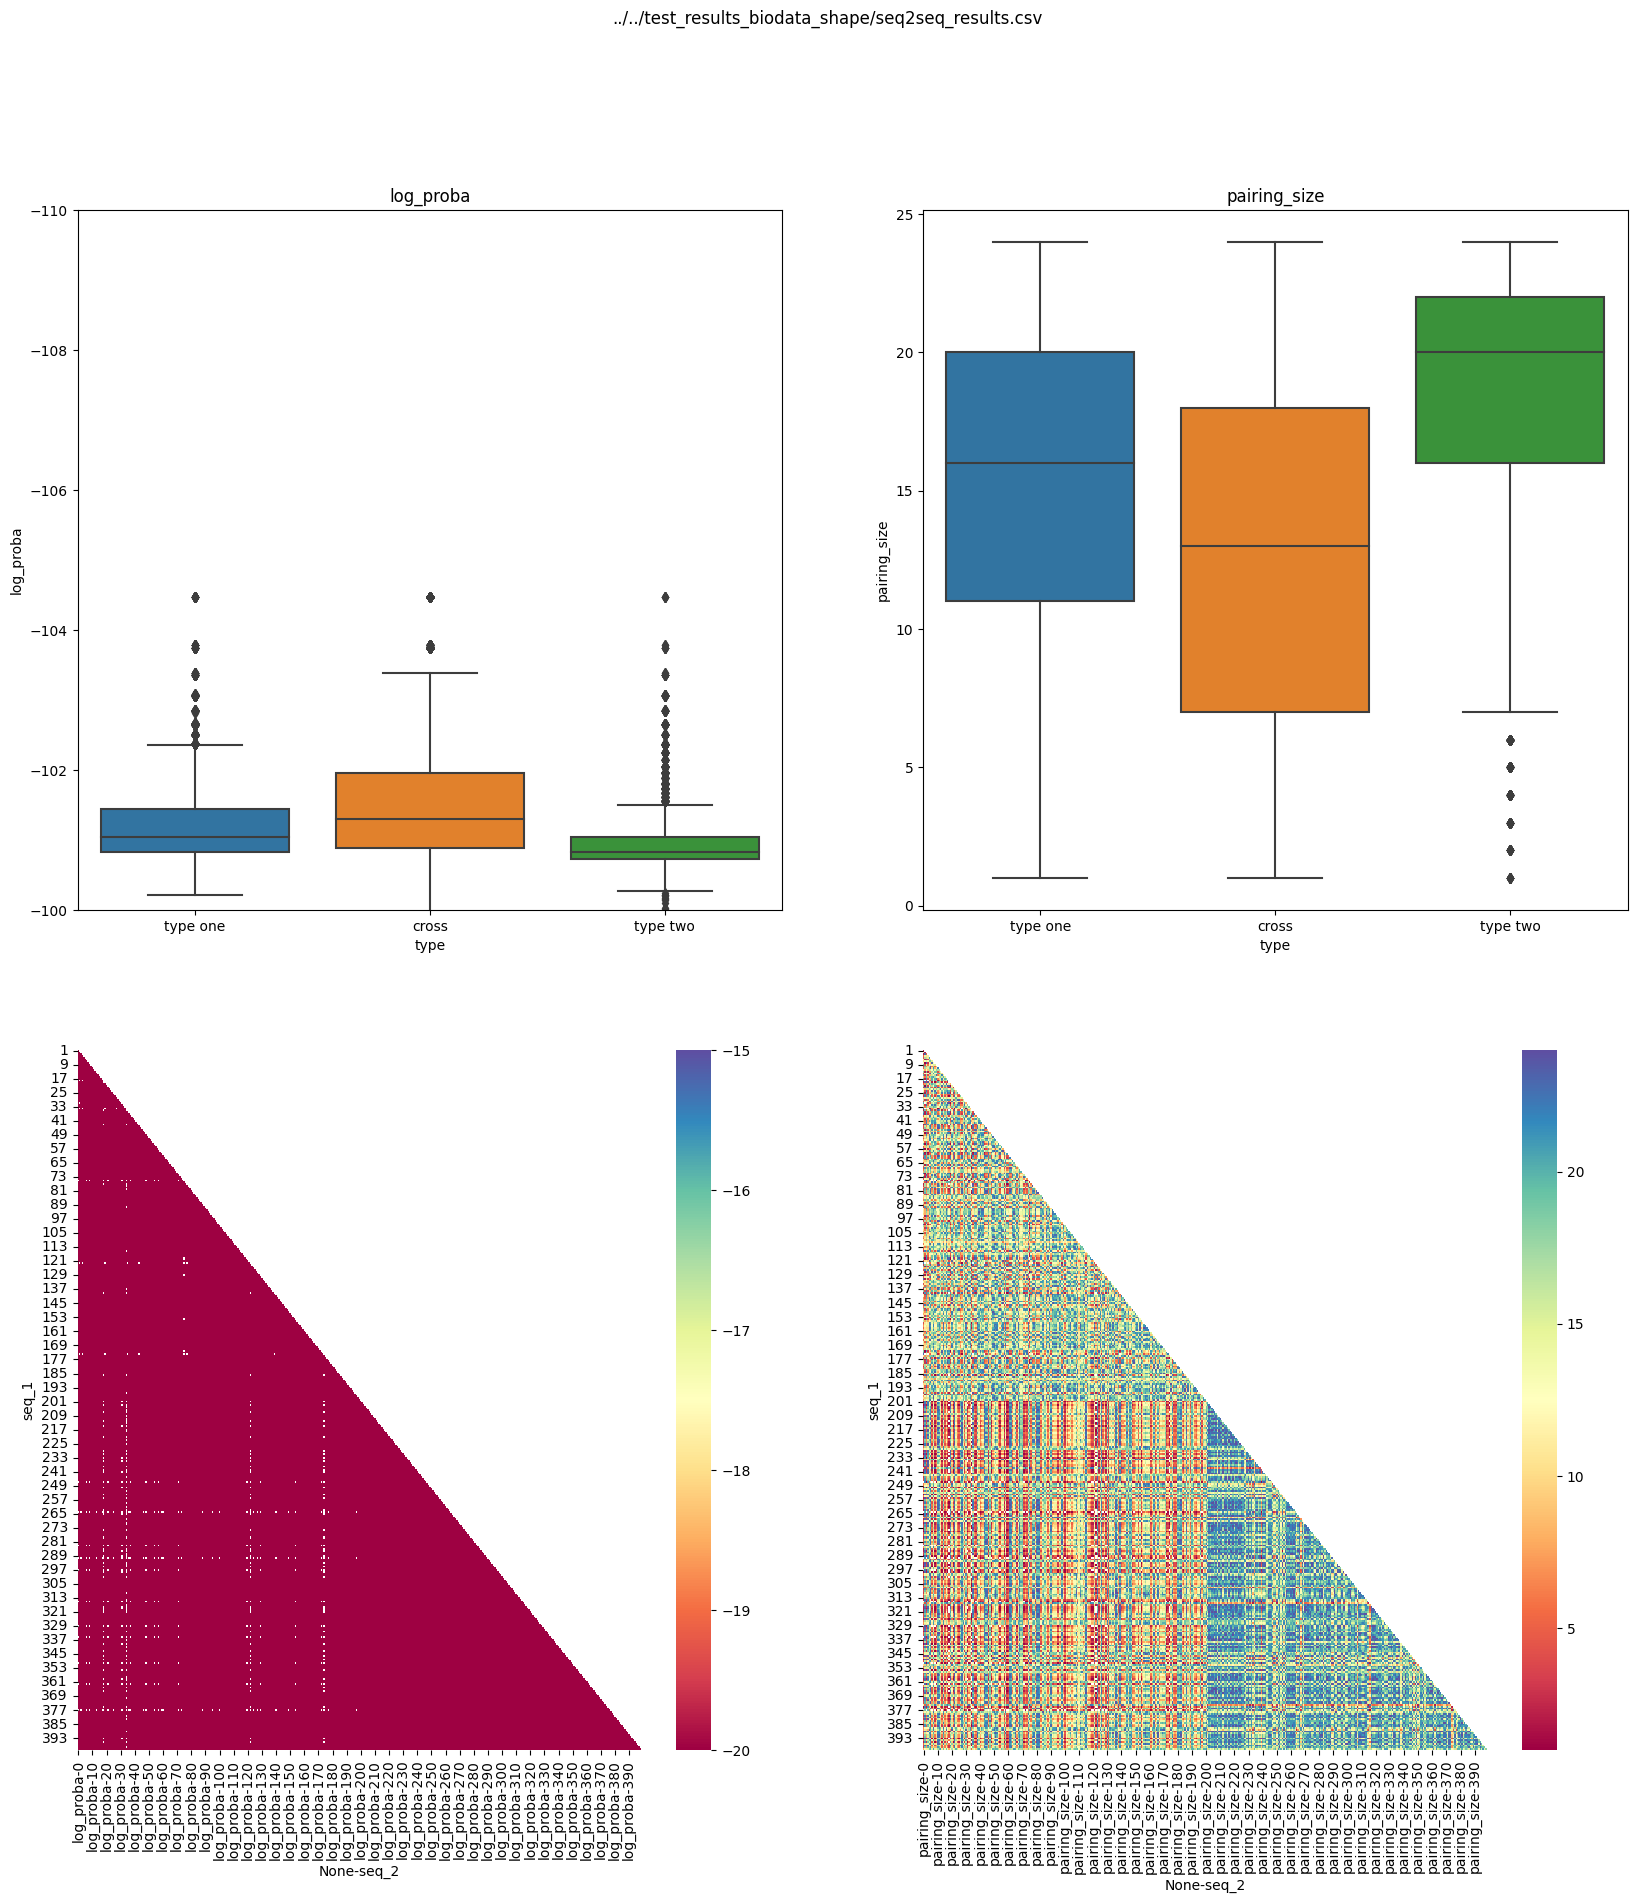

In [3]:
filename = "../../test_results_biodata_shape/seq2seq_results.csv"
df = pd.read_csv(filename, sep=';', header=None)
df.columns = ["seq_1", "seq_2", "proba", "pairing_size", "pairing"]
df['log_proba'] = np.log(df['proba'])
df['type'] = df.apply(lambda row: type_of_pair(row["seq_1"], row["seq_2"]), axis=1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

sns.boxplot(data=df, x='type', y='log_proba', ax=axes[0,0])
axes[0,0].set_ylim(-100, -110)
axes[0,0].set_title("log_proba")

sns.boxplot(data=df, x='type', y='pairing_size', ax=axes[0,1])
axes[0,1].set_title("pairing_size")

mat = pd.pivot_table(df, values=['log_proba'], columns=['seq_2'], index=['seq_1'])
sns.heatmap(mat, vmin=-20, vmax=-15, cmap="Spectral", ax=axes[1,0]) 

mat = pd.pivot_table(df, values=['pairing_size'], columns=['seq_2'], index=['seq_1'])
sns.heatmap(mat, cmap="Spectral", ax=axes[1,1])

plt.suptitle(filename)
plt.show()